<a href="https://colab.research.google.com/github/rahool010/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
print(data.shape)

(119390, 32)


In [5]:
# data summary
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The dataset has 32 features (Continuous and Categorical)  with one identified dependant variable which is 'is_canceled'

In [7]:
# checking null values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


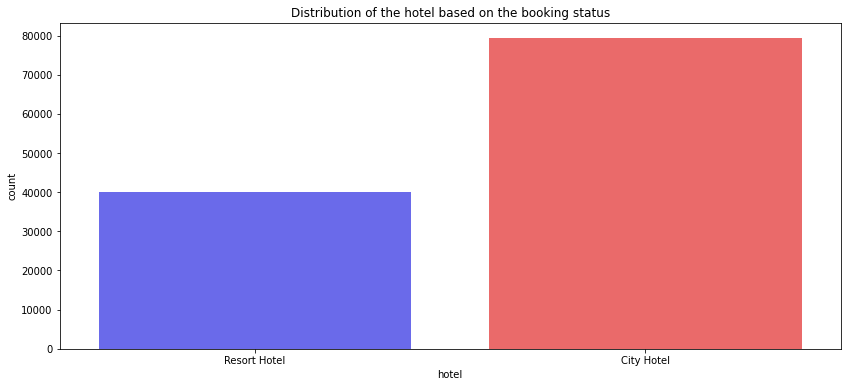

In [8]:
plt.figure(figsize=(14,6))
data['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)
sns.countplot(data['hotel'],hue='is_canceled', data = data, palette = 'seismic')
plt.title("Distribution of the hotel based on the booking status")
plt.show()

In [9]:
# let's create a new column to indicate
# 0 - reserved room and assigned room is different
# 1 - reserved room and assigned room is same
data['same_room'] = np.where(data['reserved_room_type']==data['assigned_room_type'],'1', '0') 

In [10]:
data['same_room'].value_counts()

1    104473
0     14917
Name: same_room, dtype: int64

In [11]:
len(data.select_dtypes(include='object').columns)

14

In [12]:
cat_cols=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
          "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
          "customer_type","reservation_status","is_repeated_guest","same_room"]
len(cat_cols)

14

In [13]:
num_cols = [col for col in data.columns if col not in cat_cols]
num_cols

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date']

# Data Cleaning

In [14]:
null_per=data.isnull().sum()/data.shape[0]*100

In [15]:
# columns with null values and their missing percentage
null_cols={}
for i in data.columns:
    if data[i].isnull().sum()>0:
        null_cols[i]=null_per[i]
null_cols

{'agent': 13.686238378423655,
 'children': 0.003350364352123293,
 'company': 94.30689337465449,
 'country': 0.40874445095904177}

In [17]:
# As the dataset contains missing values. There is a need to drop the columns with high missing values 
data.drop(['agent','company'], axis=1, inplace = True)

In [18]:
data.dropna(how='any',inplace=True)

In [19]:
data.isnull().sum().sum()

0

# EDA and Visualisation

## **What is the most preferred meal of guests**

In [40]:
meal = data['meal'].value_counts().reset_index().rename(columns={'index':'meal','meal':'count'})
meal

,meal,count
0,BB,91863
1,HB,14434
2,SC,10638
3,Undefined,1165
4,FB,798


## **What is the booking status for each type of hotel**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


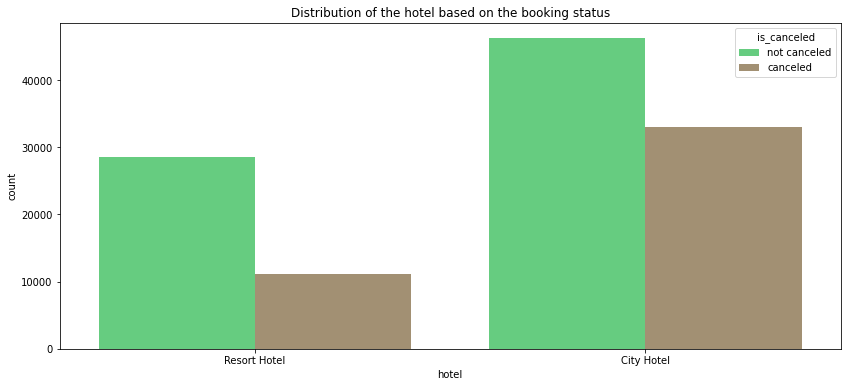

In [20]:
plt.figure(figsize=(14,6))
data['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)
sns.countplot(data['hotel'], data = data, hue='is_canceled', palette = 'terrain');
#plt.title('Number of Cancelled Bookings for City hotel and Resort hotel ')
plt.title("Distribution of the hotel based on the booking status")
plt.show()

Here we see most of the booking are in city hotel and also the cancellation rate is high in city hotel as compared to resort hotel

## Which Country has majority of reservations

In [21]:
country_booking = data['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
country_booking

,country,Percentage
0,PRT,0.408636
1,GBR,0.102012
2,FRA,0.087596
3,ESP,0.072062
4,DEU,0.061288
...,...,...
172,ASM,0.000008
173,MDG,0.000008
174,SMR,0.000008
175,SLE,0.000008


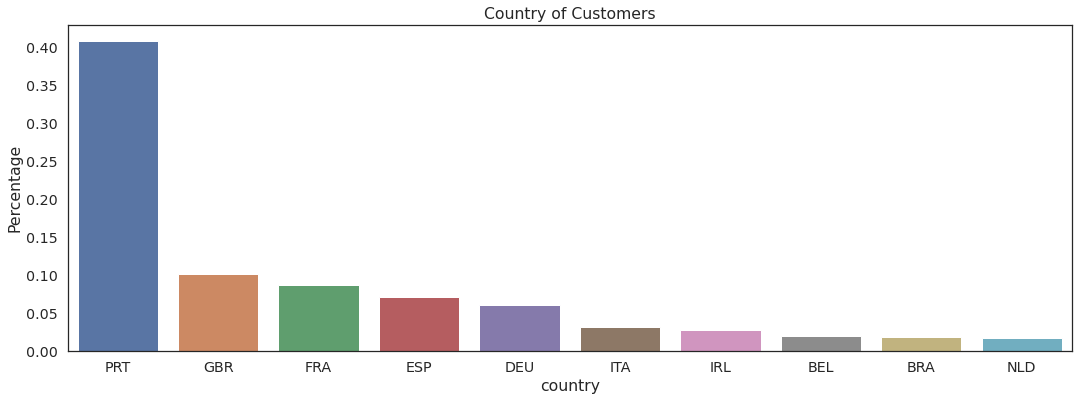

In [27]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

In [23]:
customer = data['customer_type'].value_counts(normalize=True).rename_axis('Customer Type').reset_index(name='Percentage')
customer

,Customer Type,Percentage
0,Transient,0.750004
1,Transient-Party,0.210920
2,Contract,0.034281
3,Group,0.004794


## Which year and month has the maximum number of bookings

In [32]:
busiest_month = data['arrival_date_month'].value_counts().reset_index(name='Percentage')
busiest_month

,index,Percentage
0,August,13852
1,July,12628
2,May,11779
3,October,11095
4,April,11045
5,June,10927
6,September,10467
7,March,9739
8,February,8012
9,November,6752


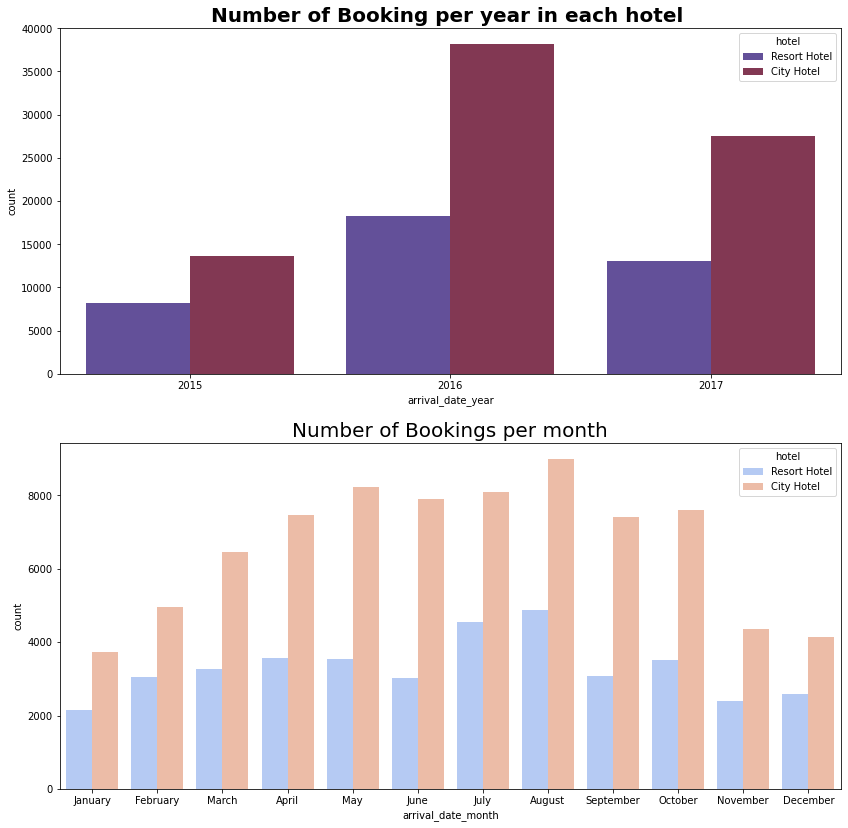

In [ ]:
# arrival per year and month
plt.figure(figsize=(14, 14))
plt.subplot(2, 1, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=data,palette='twilight')
plt.title("Number of Booking per year in each hotel ",fontweight="bold", size=20)

months=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August','September', 'October', 'November', 'December']
plt.subplot(2, 1, 2)
sns.countplot(x = 'arrival_date_month', hue='hotel', data=data, order=months, palette='Purple')
plt.title('Number of Bookings per month', size=20)
#plt.subplots_adjust(right=1.7)

plt.show()

We can see most of the bookings were in the year 2016 and bookings were done in City hotel
Most bookings were done in the month of May,June, July, August.
It is clear that August, July and May are the most occupied months in case of both City and Resort Hotels

In [ ]:
# Total number of  Guests 

data['total_guests'] = data['adults'] + data['children'] + data['babies']
print(data.groupby('total_guests').size().sort_values(ascending = False))

In [1]:
# Summary
print(data.total_guests.describe())

NameError: ignored

In [ ]:
plt.figure(figsize = (14, 6))
sns.countplot(x = 'total_guests', data = data,palette = 'rainbow',
              order = data['total_guests'].value_counts().head(10).index)
plt.title('Number of Guests including Adults, Children & Babies', fontsize = 16)
plt.show()

The trend shows that majority of reservations stay for two or three night.\
It can be presumed that this is reflected by people going away by Friday,\
Saturday and Sunday.

## Which nationalities make the highest number of reservations?

In [ ]:
# Create data of  top 10 countries
data_prt = data[data.country == 'PRT']
data_gbr = data[data.country == 'GBR']
data_fra = data[data.country == 'FRA']
data_esp = data[data.country == 'ESP']
data_deu = data[data.country == 'DEU']
data_ita = data[data.country == 'ITA']
data_irl = data[data.country == 'IRL']
data_bel = data[data.country == 'BEL']
data_bra = data[data.country == 'BRA']
data_nld = data[data.country == 'NLD']

# Create a dataset by combining data of top 10 countries
data_top10 = pd.concat([data_fra, data_gbr, data_prt, data_deu, data_esp,
                        data_ita,data_irl, data_bel, data_bra, data_nld]).reset_index(drop=True)

In [ ]:
data_top10.groupby('country')['reservation_status'].value_counts()

In [ ]:
reservation_countries = data_top10.groupby(['country','reservation_status']).lead_time.count()
print(reservation_countries)

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'lead_time', y = 'country', hue = 'reservation_status',
            data = reservation_countries.reset_index(), palette = 'hot')
plt.title('Reservation Status for Each Country', fontsize = 16)
plt.ylabel('count', fontsize = 14)
plt.xlabel('Top 10 Countries', fontsize = 14)
L=plt.legend()
plt.show()

The above graph depicts that Portugal has the most number of reservations,\
but it also has more cancelations than check-outs.\
Portuguese nationals make the greatest number of reservations.\
Unfortunately, it the number of cancelations is greater than the number of \
people checking-out for the Portuguese.

In [35]:
cat_cols1 = ['is_repeated_guest','reserved_room_type','assigned_room_type','reservation_status',
             'is_canceled','same_room','customer_type','market_segment']

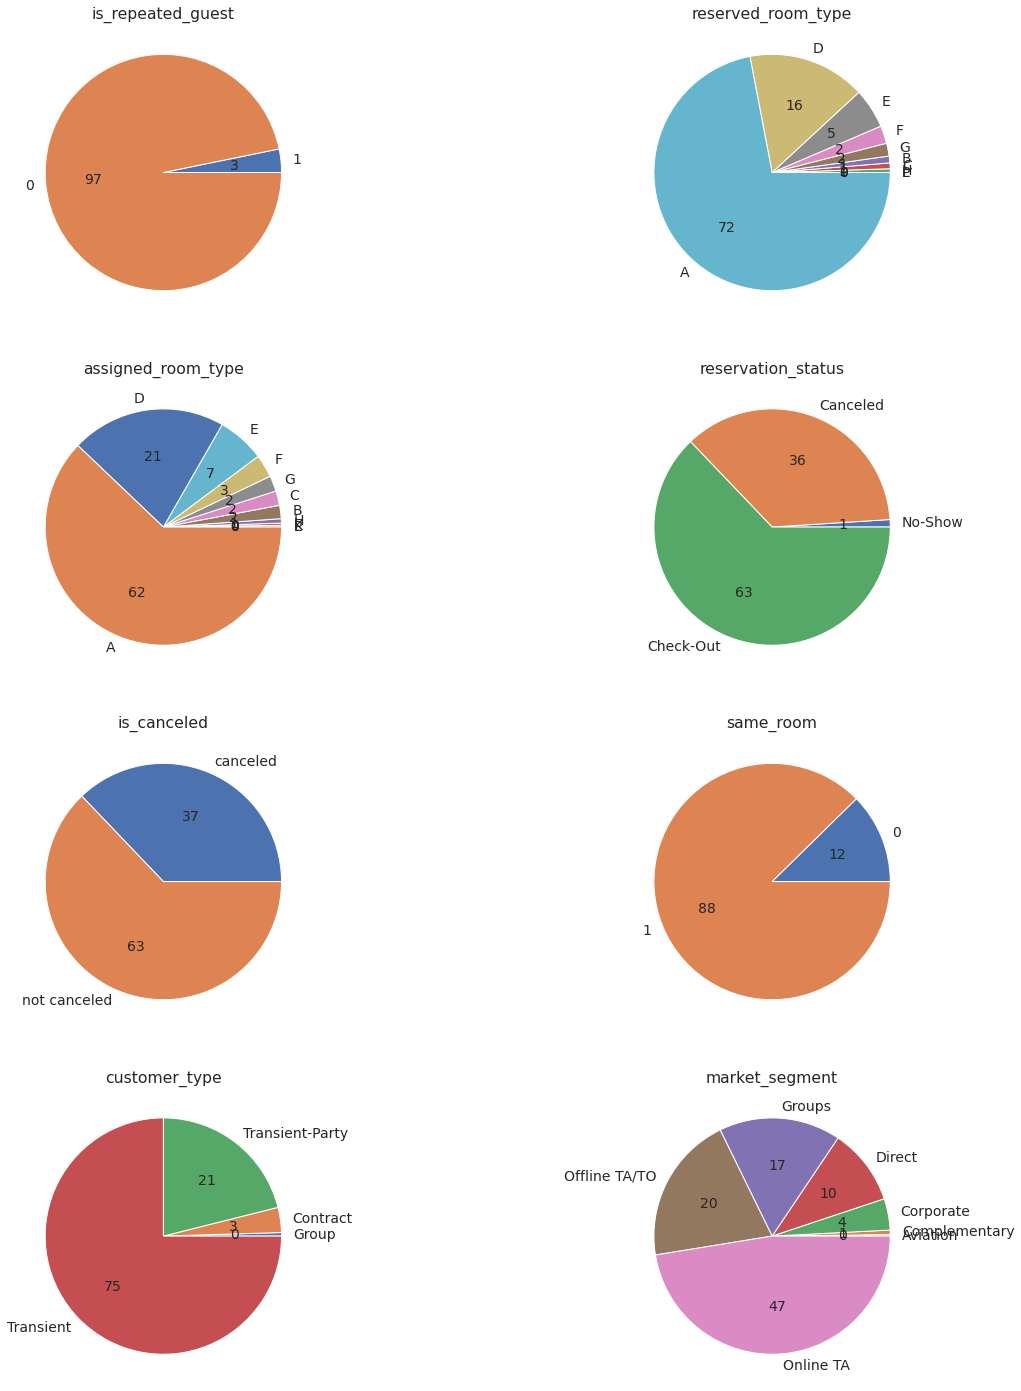

In [36]:
plt.figure(figsize=(20,25))
for i, col in enumerate(data[cat_cols1]):
    plt.subplot(4,2,i+1)
    data[col].value_counts()[::-1].plot(kind = 'pie', title=col, fontsize=14, autopct='%.0f')
    plt.ylabel('')
plt.show()

### Conclusions:

1) Only 3% of guests are repeated\
2) 72% guests book room type A but only 62% guests were assigned to the room type A\
3) 36% reservation were cancelled by guests\
4) 63% bookings were done and 37% bookings were cancelled\
5) 88% guests were assigned the same room
6) 75% customers are transient. These are the solo travellers\
7) Majority of the market segment is online TA 